In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from matplotlib import image

import os
from os import listdir
import PIL
import time

In [2]:
'''

TL;DR:

The easiest and most efficient way to load an image into NumPy arrays 
is to load matplotlib imread() function and converting pillow image
object 

'''

'\n\nTL;DR:\n\nThe easiest and most efficient way to load an image into NumPy arrays \nis to load matplotlib imread() function and converting pillow image\nobject \n\n'

In [3]:
# path to dataset
path = ("/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset/jpeg/00a314d4-adc6-460f-873f-1680564195bc-1.jpg")

In [4]:
# Importing pillow to load and show the images 
# Module not to be used in production, only to display image in notebook

from PIL import Image

pillow_test_image = Image.open(path)

# Summarizing details about the image
print(pillow_test_image.format)
print(pillow_test_image.mode)
print(pillow_test_image.size)

pillow_test_image.show()

JPEG
RGB
(822, 800)


uint8
(800, 822, 3)


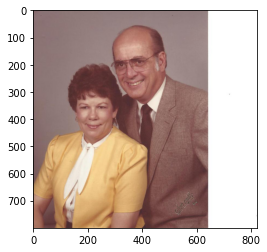

In [5]:
'''
We can obtain the same results as above cell if
we convert the images to NumPy arrays and back using matplotlib library.

We wont want to open each image, rather, we only need to load it and
convert it into a numpy array

'''

# Loading the image
data = image.imread(path)

# Summarizing shape of the pixel array
print(data.dtype)
print(data.shape)

# Displaying the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [6]:
"""

The above image has a data type of 8-bit unsigned integers with
an array shape of 800 pixels wide by 822 pixels high with 3 channeels (r,g,b)

This seems like a normal image, thus easy to manipulate.

Let's follow the same approach, but iteratively for all images in a directory

"""

"\n\nThe above image has a data type of 8-bit unsigned integers with\nan array shape of 800 pixels wide by 822 pixels high with 3 channeels (r,g,b)\n\nThis seems like a normal image, thus easy to manipulate.\n\nLet's follow the same approach, but iteratively for all images in a directory\n\n"

In [12]:
'''

Random sampling files from image directory and simple distribution

'''



# Randomly sampling the directory
from pathlib import Path
import random
import shutil

directory = ('/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset/jpeg/')

file_count = len(directory)
file_count_original = len('/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset')
print("Original pdf dataset total count is: " + str(file_count_original))
print("Jpg dataset total count is: " + str(file_count))
list = os.listdir(directory)
k = 20
population = list
files = random.sample(population, k)
# copying randomly sampled files to sampled_images folder in directory
for f in files:
    shutil.copy(f,'/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset/jpeg/sampled_images')




Original pdf dataset total count is: 114
Jpg dataset total count is: 120


In [14]:
# printing files as string in sampled_images fodler in directory
sampled_images = os.chdir('/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset/jpeg/sampled_images')

# read the entries
with os.scandir(sampled_images) as listOfEntries:
    for entry in listOfEntries:
        # print all entries that are files
        if entry.is_file():
            print(entry.name)

f221a505-2545-42df-8db7-3686726d23f2-1.jpg
.DS_Store
718679ea-43cb-4882-a0c1-47deb15b94a5-1.jpg
bc673fc4-04f2-43ba-a5a8-255138004a16-1.jpg
feda2574-8c62-48ca-83c2-42b591f1104a-1.jpg
5642006e-8180-4bdd-aff8-e14358180c2d-1.jpg
acea1970-56d8-40bf-abe6-fcad493d4665-1.jpg
0f9fb0ef-f001-4eba-93fe-23ab9212c03f-1.jpg
46c8bea8-e6d0-48ca-8dd7-af27c5a9bd65-1.jpg
b8328a55-2f08-4645-b96b-bfe9df07bf86-1.jpg
a7ba529a-67b2-4f5e-9bcb-8111622b347b-1.jpg
e63ac698-30ba-4671-bde3-7d3d4a4cda43-1.jpg
9e0959c3-0b59-4904-a9f0-b45a12d63547-1.jpg
e7e0840d-df10-43ea-b801-c550c24a9f1c-1.jpg
7768d79a-979f-4104-9454-0153dc4c1f19-1.jpg
1726b696-ed7d-49e5-be83-9190a41695a0-1.jpg
6a60e483-5529-428a-aa4e-95dcaffed7f5-1.jpg
9e43f72c-fcdc-49ff-afce-ec68e8c71c6d-1.jpg
89fd3488-f480-4c04-94d8-98899346dfd2-1.jpg
9160db08-7026-4036-9fec-2d217abfb6d4-1.jpg
68f4f681-e865-4898-867d-21b26819319f-1.jpg


In [40]:
# Open all the randomly sampled images
import glob
import cv2

# As an np.array
imagesnp = []
for f in glob.glob('/Users/josephwoodall/ds_personal_projects/brooks_family_photo_project/brooks_family_photo_project_original_dataset/jpeg/sampled_images/*'):
    imagesnp.append(np.asarray(Image.open(f)))
imagesnp = np.array(imagesnp)

imagesnp

array([array([[[ 33,  33,  33],
        [ 31,  31,  31],
        [ 32,  32,  32],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 39,  39,  39],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 38,  38,  38],
        [ 31,  31,  31],
        [ 28,  28,  28],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 18,  18,  18],
        [ 74,  74,  74],
        [177, 177, 177],
        ...,
        [250, 250, 250],
        [248, 248, 248],
        [195, 195, 195]],

       [[ 18,  18,  18],
        [ 74,  74,  74],
        [177, 177, 177],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [237, 237, 237]],

       [[ 18,  18,  18],
        [ 74,  74,  74],
        [177, 177, 177],
        ...,
        [248, 248, 248],
        [247, 247, 247],
        [232, 232

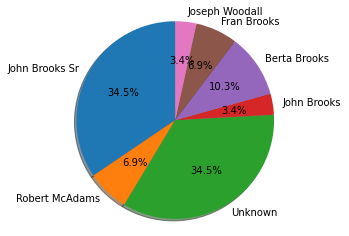

In [2]:
# Representing distribution
# Uknown may represent more than one individual
# Age range of individuals in dataset: infant to elder
# Dataset contains same individual across age range

import matplotlib.pyplot as plt

labels = ['John Brooks Sr', 'Robert McAdams', 'Unknown', 'John Brooks', 'Berta Brooks', 'Fran Brooks', 'Joseph Woodall']
sizes = [10, 2, 10, 1, 3, 2, 1]
explode = (0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()